In [2]:
#importing packages
import pandas as pd
from google.colab import files
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [5]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving clustered_data.csv to clustered_data.csv
User uploaded file "clustered_data.csv" with length 39956432 bytes


In [26]:
final = pd.read_csv("clustered_data.csv")

In [7]:
final.columns

Index(['Store_Number', 'Item_Code', 'Item_Name', 'Retail_Price',
       'Count_Week_Instock', 'Normalized_Sales_$L52W', 'Sales Bucket',
       'Store_Name', 'Open_Date', 'Market_Name', 'Store_Address', 'Households',
       'Perc_HH_Income_above100K', 'Median_HH_Income', 'Average_Net_Worth',
       'Perc_Population_Bachelor_Degree', 'Perc_Hispanic', 'Perc_Asian',
       'Perc_African_American', 'Perc_Population_Age_50-70', 'US Whiskey',
       'Tequila Under $65', 'Tequila Over $65', 'Scotch Under $75',
       'Scotch Over $75', 'Vodka', 'Cordials', 'Brandy Under $85',
       'Brandy Over $85', 'Cabernet Under $20', 'Cabernet $20-50',
       'Cabernet Over $50', 'Chardonnay Under $20', 'Chardonnay Over $20',
       'Wine - Sparkling', 'Pinot Noir Under $20', 'Pinot Noir Over $20',
       'Sauvignon Blanc', 'French Champagne', 'Market_Sales_L52wk',
       'Count_Item_Location', 'Store_Age_Days', 'High_Education_High_Income',
       'Diversity_Index', 'Age_Income_Ratio', 'Price_Per_Househ

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [9]:
columns_to_encode = ['Store_Number', 'Item_Code', 'Market_Name']

final = pd.get_dummies(final, columns=columns_to_encode, drop_first=True)


In [10]:
num_columns = final.shape[1]
print(f"Number of columns after encoding: {num_columns}")

Number of columns after encoding: 2502


In [11]:
columns_to_drop = ['Item_Name', 'Count_Week_Instock', 'Store_Address', 'Store_Name', 'Open_Date', 'index','Normalized_Sales_$L52W']
final = final.drop(columns=columns_to_drop, errors='ignore')

In [12]:
final = final.replace({True: 1, False: 0})

<ipython-input-12-2adf60770735>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final = final.replace({True: 1, False: 0})


In [13]:
data = final[final['Sales Bucket'] == 'Sales included']
pred = final[final['Sales Bucket'] == 'Sales excluded for model test']

In [14]:
data= data.dropna()
pred = pred.dropna()

In [15]:
columns_to_drop = ['Sales Bucket']
data = data.drop(columns=columns_to_drop, errors='ignore')
pred = pred.drop(columns=columns_to_drop, errors='ignore')

In [16]:
x = data.drop(columns=['Market_Sales_L52wk'], errors='ignore')
y = data['Market_Sales_L52wk']

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [23]:
x_pred = pred.drop(columns=['Market_Sales_L52wk'], errors='ignore')

In [24]:


# Replace the following placeholders with your dataset loading steps
# X_train, X_test, y_train, y_test = ...


X_train_scaled = X_train.to_numpy()
X_test_scaled = X_test.to_numpy()

y_train  = y_train.to_numpy()
y_test  = y_test.to_numpy()



# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Single neuron for regression output
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 25414412009472.0000 - mean_squared_error: 25414412009472.0000 - val_loss: 23033609715712.0000 - val_mean_squared_error: 23033609715712.0000
Epoch 2/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 24979439616000.0000 - mean_squared_error: 24979439616000.0000 - val_loss: 22988097323008.0000 - val_mean_squared_error: 22988097323008.0000
Epoch 3/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22638216871936.0000 - mean_squared_error: 22638216871936.0000 - val_loss: 21074917982208.0000 - val_mean_squared_error: 21074917982208.0000
Epoch 4/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 20935987953664.0000 - mean_squared_error: 20935987953664.0000 - val_loss: 18120886452224.0000 - val_mean_squared_error: 18120886452224.0000
Epoch 5/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 20794300170240.0000 - mean_squared_error: 20794300170240.0000 - val_loss: 17895671201792.0000 - val_mean_squared_error: 17

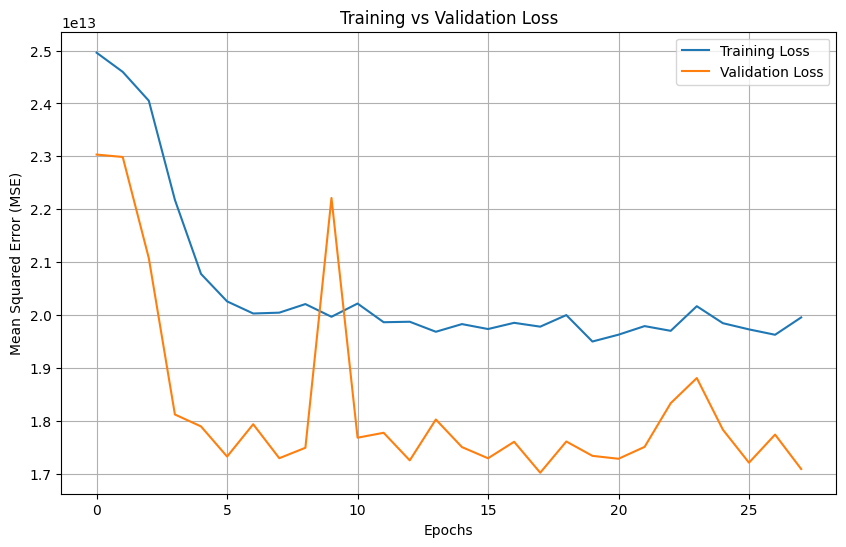

435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16186407387136.0000 - mean_squared_error: 16186407387136.0000


Test MSE: 17020453126144.0
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
# Plot training vs validation error
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
loss, mse = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse}")

# Save the model
model.save('regression_ann_model.h5')

# Predicting on test set
predictions = model.predict(X_test_scaled)
